In [4]:
# check df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61216 entries, 0 to 61215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   _id     61216 non-null  object        
 1   date    61216 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 956.6+ KB


In [2]:
# load second part of data
collection = "muenchen"
mycol = mydb[collection]


abfrageErgebnis = mycol.find( {}, {"items": 0})
listFromAbfrageErgebnis = list(abfrageErgebnis)
df2 = pd.DataFrame(listFromAbfrageErgebnis)

In [3]:
# check df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   _id     5374 non-null   object        
 1   date    5374 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 84.1+ KB


In [5]:
# merge dataframes
frames = [df, df2]

result = pd.concat(frames)

In [6]:
# check output
result = result.sort_values(by=('date'))
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66590 entries, 0 to 61215
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   _id     66590 non-null  object        
 1   date    66590 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ MB


In [7]:
# first timestamp
result['date'].iloc[0]

Timestamp('2020-04-03 06:55:32.682000')

In [8]:
# last timestamp
result['date'].iloc[-1]

Timestamp('2021-03-06 23:29:00.384000')

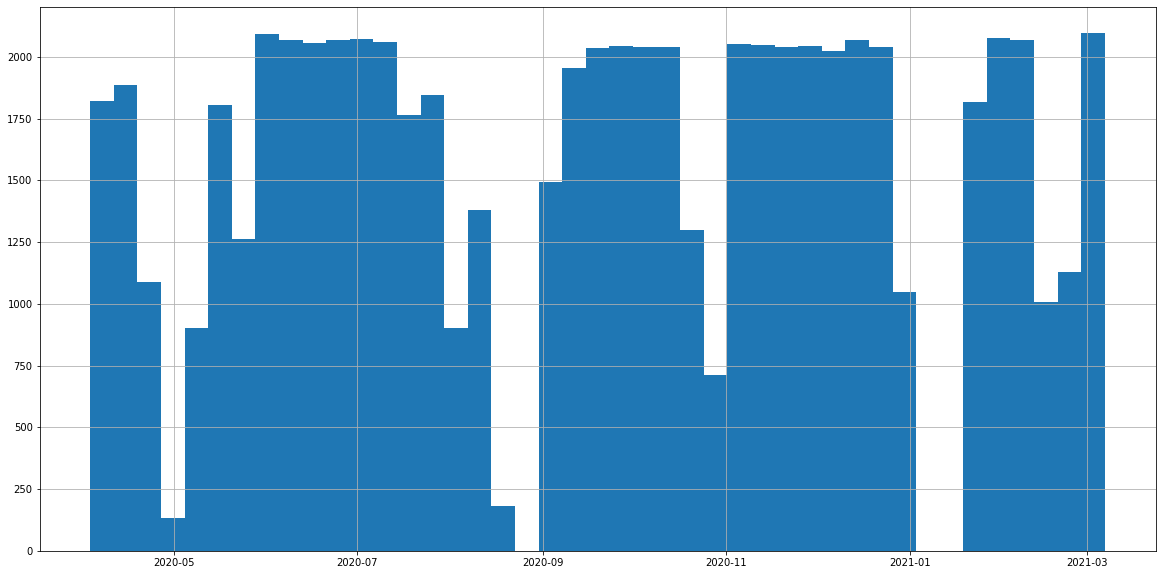

In [9]:
# plot data for date to visualize gaps
result['date'].hist(bins='auto', figsize=(20,10));

In [10]:
# count amount and length of gap to previous row, filter for 20 minutes
result['gaps>20min'] = (result['date'].diff()).dt.seconds > 1200
result['sizeGap'] = result['date'].diff()
result['gaps>20min'].value_counts()

False    66532
True        58
Name: gaps>20min, dtype: int64

In [11]:
# save gaps to seperate csv file
result[result['gaps>20min'] == True].to_csv('Lücken.csv', index=False)

In [12]:
# print gaps
result[result['gaps>20min'] == True]

,_id,date,gaps>20min,sizeGap
38,5e87168e92c75b7b0e239607,2020-04-03 10:57:18.921,True,0 days 00:31:12.783000
830,5e8c599eaccced61a54da0a5,2020-04-07 10:44:46.372,True,1 days 01:11:42.974000
3148,5e97e9af967eac4591a04bbf,2020-04-16 05:14:23.751,True,0 days 01:08:16.016000
3543,5e9ac0ea441555ea0bc6b6a0,2020-04-18 08:57:14.236,True,0 days 16:06:05.769000
4204,5e9e87ca7271de049dce63eb,2020-04-21 05:42:34.190,True,0 days 08:47:04.195000
4496,5ea079bfc06dce365a3b61cd,2020-04-22 17:07:11.385,True,0 days 07:37:56.575000
4711,5ea401d4a363822844db5bff,2020-04-25 09:24:36.871,True,1 days 20:43:31.189000
4745,5ea435cdef73e3014f598b87,2020-04-25 13:06:21.642,True,0 days 00:44:52.042000
4793,5ea4844d780a09e9bcbc3d99,2020-04-25 18:41:17.621,True,0 days 01:25:56.409000
4796,5eabb246bb65f316ba7d0a1d,2020-05-01 05:23:18.343,True,5 days 10:31:24.344000


In [13]:
# mean time gap in data
result[result['gaps>20min'] == True]['sizeGap'].mean()

Timedelta('1 days 09:57:19.632068965')

Fazit: Alle Fahrten > 10 Stunden werden herausgefiltert um den Lücken im Datensatz gerecht zu werden.